In [1]:
# packages
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read dataset
data = pd.read_csv('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/track/NEPARTAK11W.2021072718.stats.tpc', header=None, delim_whitespace=True, skiprows=11)
ds1 = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f000.nc') #hour0
ds2 = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f003.nc') #hour3
ds3 = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f006.nc') #hour6

#data
colspecs = [(5, 10), (18, 25), (32, 38), (56, 63), (89, 95)]
df = pd.read_fwf('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/track/NEPARTAK11W.2021072718.stats.tpc', 
                 colspecs=colspecs, header=None, skiprows=12, names=['hour', 'lon', 'lat', 'P', 'V'])
df = df[:41]
df.head()

,hour,lon,lat,P,V
0,0.,142.0,37.8,985.0,41.0
1,3.,141.8,38.4,992.0,43.0
2,6.,141.6,38.9,994.0,39.0
3,9.,141.2,39.7,997.0,34.0
4,12.,140.7,40.4,997.0,29.0


In [3]:
ds2

<xarray.Dataset>
Dimensions:              (latitude: 601, longitude: 601, time: 1)
Coordinates:
  * latitude             (latitude) float64 33.69 33.7 33.72 ... 42.67 42.69
  * longitude            (longitude) float64 136.5 136.5 136.5 ... 145.5 145.5
  * time                 (time) datetime64[ns] 2021-07-27T21:00:00
Data variables:
    PRMSL_meansealevel   (time, latitude, longitude) float32 ...
    PRES_surface         (time, latitude, longitude) float32 ...
    UGRD_10maboveground  (time, latitude, longitude) float32 ...
    VGRD_10maboveground  (time, latitude, longitude) float32 ...
    PRATE_surface        (time, latitude, longitude) float32 ...
    APCP_surface         (time, latitude, longitude) float32 ...
    ACPCP_surface        (time, latitude, longitude) float32 ...
    NCPCP_surface        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0

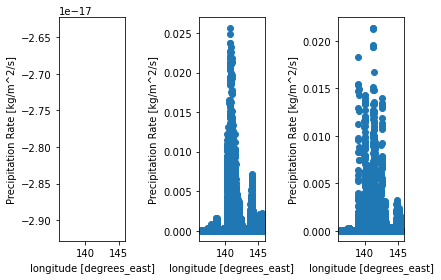

In [4]:
#plot random variables
fig, axes = plt.subplots(ncols=3)
ds1.plot.scatter(x='longitude', y='PRATE_surface',ax=axes[0])
ds2.plot.scatter(x='longitude', y='PRATE_surface',ax=axes[1])
ds3.plot.scatter(x='longitude', y='PRATE_surface',ax=axes[2])
plt.tight_layout()

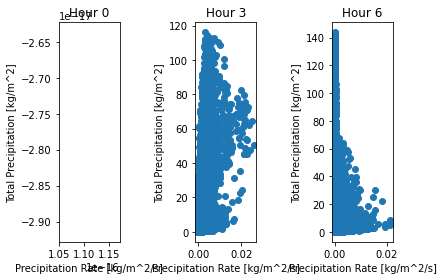

In [5]:
#plot p-rate and cumulative rain over 6 hours
fig, axes1 = plt.subplots(ncols=3)
ds1.plot.scatter(x='PRATE_surface', y='APCP_surface',ax=axes1[0])
axes1[0].title.set_text('Hour 0')
ds2.plot.scatter(x='PRATE_surface', y='APCP_surface',ax=axes1[1])
axes1[1].title.set_text('Hour 3')
ds3.plot.scatter(x='PRATE_surface', y='APCP_surface',ax=axes1[2])
axes1[2].title.set_text('Hour 6')
plt.tight_layout()

/opt/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


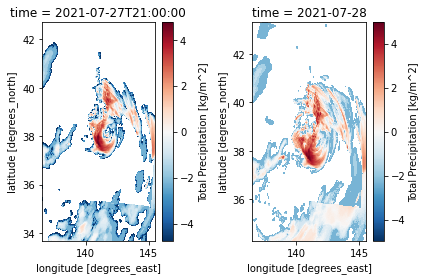

In [6]:
fig, axes2 = plt.subplots(ncols=2)
np.log(ds2.APCP_surface).plot(ax=axes2[0])
np.log(ds3.APCP_surface).plot(ax=axes2[1])
plt.tight_layout()
#np.diff(ds2.latitude)
#ds2.longitude.shape

## TO-DO:

1. Make variable which is #theta, variable which is #r

2. Find max_r (how big of circle can fit into box -- factor of sqrt(2))

3. (a) Make 2 grids/vectors (r grid: 0 to max_r -- linspace(), theta grid)

   (b) [2dr, 2dt] = Meshgrid(r,t) (makes 2d grid using coordinates above)
4. (a) x=rcos(theta), y=rsin(theta) (use 2d version of r,theta: from meshgrid)

   (b) shift center to storm center (difference of lon,lat from center --> convert to km, add to x,y)
   
5. Interpolate values onto x,y (linearnd or nearestnd interpolator)

6. New data in r,theta -> plot in polar (polar projection, avg wrt theta)


start w lat,lon -> translate onto r,theta grid
make plot on tpc data (i.e. put an x on the graph to see)

<xarray.DataArray 'APCP_surface' (latitude: 601, longitude: 601)>
[361201 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 33.69 33.7 33.72 33.73 ... 42.66 42.67 42.69
  * longitude  (longitude) float64 136.5 136.5 136.5 136.5 ... 145.5 145.5 145.5
    time       datetime64[ns] 2021-07-27T21:00:00
Attributes:
    short_name:  APCP_surface
    long_name:   Total Precipitation
    level:       surface
    units:       kg/m^2
Index of Max:  161370
Index of Lat,Lon of Max:  268 , 302
<xarray.DataArray 'APCP_surface' ()>
array(116.03, dtype=float32)
Coordinates:
    latitude   float64 37.71
    longitude  float64 141.0
    time       datetime64[ns] 2021-07-27T21:00:00
Attributes:
    short_name:  APCP_surface
    long_name:   Total Precipitation
    level:       surface
    units:       kg/m^2
Center (lat, lon): (37.708, 141.030)


/opt/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


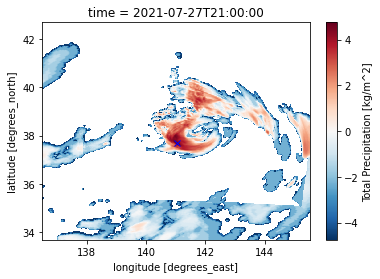

In [3]:
#FIND CENTER OF STORM

print(ds2.APCP_surface[0])
print("==================")
#print(ds2.APCP_surface.dims)

#arg = ds2.idxmax(dim='APCP_surface')
#print(arg)
#print(arg_max)
#test = np.array(ds2.APCP_surface)[0]
#print(test.shape)
#print(test)

#FIND INDICES
arg_max = int(np.argmax(np.array(ds2.APCP_surface)))
print("Index of Max: ", arg_max)
center_lat_ind = arg_max // 601
center_lon_ind = arg_max % 601
print("Index of Lat,Lon of Max: ", center_lat_ind, ",", center_lon_ind)
print("==================")

#FIND COORD
center = ds2.APCP_surface[0][arg_max // 601][arg_max % 601]
print(center)
center_lat = center['latitude'].values
center_lon = center['longitude'].values
print("==================")
print('Center (lat, lon): (%.3f, %.3f)' % (center_lat, center_lon))

#center_lat = np.max(ds2.APCP_surface)
#center_lon = max(ds2.APCP_surface)[2]
#print(center_lat)
#print(center_lon)

#plt.plot(np.log(ds2.APCP_surface))
np.log(ds2.APCP_surface).plot()
plt.plot(center['longitude'].values,center['latitude'].values, 'bx')
plt.show()

max_r:  6.691883143029592


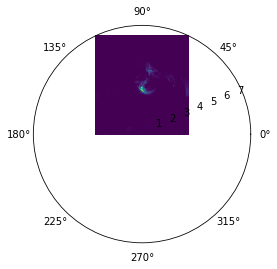

In [9]:
#thetas = ds2.
#rs = ds2.
xcoord, ycoord = ds2['longitude'], ds2['latitude']
Xin=np.asarray(xcoord).astype('float64')
Yin=np.asarray(ycoord).astype('float64')

max_r = np.max(np.sqrt(np.power(Xin-center_lon,2)+np.power(Yin-center_lat,2)))
print("max_r: ", max_r)


thetas_grid = np.linspace(-np.pi, np.pi, num=601)
rs_grid = np.linspace(0,max_r, num=601)

thetas_gridm, rs_gridm = np.meshgrid(thetas_grid, rs_grid)

#rpol = lambda r,t: r * np.cos(np.deg2rad(t))
#tpol = lambda r,t: r * np.sin(np.deg2rad(t))
rpol = lambda x,y: np.sqrt(x**2+y**2)
tpol = lambda x,y: np.arctan2(x, y)

z = ds2.APCP_surface[0].values

#plt.polar(tpol(thetas_grid, rs_gridm), rpol(thetas_grid, rs_gridm))
plt.axes(projection = 'polar')
#plt.pcolormesh(z)
plt.pcolormesh(tpol(rs_gridm, thetas_grid), rpol(rs_gridm, thetas_grid), z)
#np.log(ds2.APCP_surface).plot()
#plt.plot(center['longitude'].values,center['latitude'].values, 'bx')
plt.show()

## Previous Codes

/opt/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


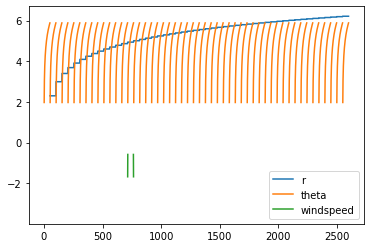

In [20]:
from scipy import interpolate

###code 1 for cartesian to polar from Prof. Lee, ADAPTED
xcoord, ycoord, windspeed = ds2['longitude'], ds2['latitude'], ds2['APCP_surface']
#xcoord, ycoord, windspeed=df.loc[:,["lon","lat","V"]] #### getval(file) is a function we wrote, so you will have to change here to your own reading function
winds = np.array(windspeed)
#winds = winds.reshape(len(xcoord), len(ycoord))

Xin=np.asarray(xcoord).astype('float64') ### Note that this are the distance to storm center in zonal direction (storm center will be (0, 0)
Yin=np.asarray(ycoord).astype('float64')

avgwind=[]
asymm=[]

# interpolator
f = interpolate.interp2d(Xin, Yin, winds)

# create empty dataframe
column_names = ['r', 'theta', 'windspeed']
polar_df = pd.DataFrame(columns = column_names)
#polar_df = polar_df.append({'r': 0.02, 'theta': 3, 'windspeed': 4}, ignore_index=True)

# fill in dataframe
for ri in range(0,501,10):
    thetas = np.arange(0,361,3.6*2)
    for ti in thetas:
        #ti=np.arange(0, 361, 3.6*2)
        #xipol=np.multiply(ri, np.cos(np.deg2rad(ti)))
        #yipol=np.multiply(ri, np.sin(np.deg2rad(ti)))
        xipol = ri * np.cos(np.deg2rad(ti))
        yipol = ri * np.sin(np.deg2rad(ti))
        wind_i = f(xipol, yipol)[0]
        #print((ri,ti,wind_i))
        polar_df = polar_df.append({'r': ri, 'theta': ti, 'windspeed': wind_i}, ignore_index=True) # can be made faster
        #wind_i=interp(winds, Xin, Yin, xipol, yipol,checkbounds=False, masked=False, order=0)
        
polar_df.groupby('windspeed').count() #check if windspeeds are unique since a lot of them look the same
np.log(polar_df).plot()

In [ ]:
###code 2 for cartesian to polar from Prof. Lee
def xy2rtheta(field,radius,dtheta,ixc,iyc,dx,dy,londis):
    """
    convert field from cartesian to cylindrical with a given radius, and dtheta
    ixc, and iyc: grid number for storm center
    londis is the longitude distance at a given latitude 
    dx, dy: distance in km for x, y grid
    """
    er = 6371.0 #km
    theta = np.pi*np.arange(0,361,dtheta)/180.
    fieldCy = np.zeros(theta.shape)
    iynew = radius*np.sin(theta)/111/dy+iyc
    ixnew = radius*np.cos(theta)/londis/dx+ixc

    for itheta in range(0,theta.shape[0],1):
        x0 = np.max([0,np.floor(ixnew[itheta]).astype(int)])
        x0 = np.min([field.shape[1]-1,x0])
        x1 = np.max([0,x0+1])
        x1 = np.min([field.shape[1]-1,x1])
        y0 = np.max([0,np.floor(iynew[itheta]).astype(int)])
        y0 = np.min([field.shape[0]-1,y0])
        y1 = np.max([0,y0+1])
        y1 = np.min([field.shape[0]-1,y1])
        Ia = field[ y0, x0 ]
        Ib = field[ y1, x0 ]
        Ic = field[ y0, x1 ]
        Id = field[ y1, x1 ]
        wa = (x1-ixnew[itheta])*(y1-iynew[itheta])
        wb = (x1-ixnew[itheta])*(iynew[itheta]-y0)
        wc = (ixnew[itheta]-x0)*(y1-iynew[itheta])
        wd = (ixnew[itheta]-x0)*(iynew[itheta]-y0)
        fieldCy[itheta] =  wa*Ia + wb*Ib + wc*Ic + wd*Id

    return fieldCy